Importing Required Libraries



In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression




In [ ]:
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# Exploratory Data Analysis


Bmi (Vücut Kitle İndeksi) dağılımını inceleyin

<Axes: ylabel='bmi'>

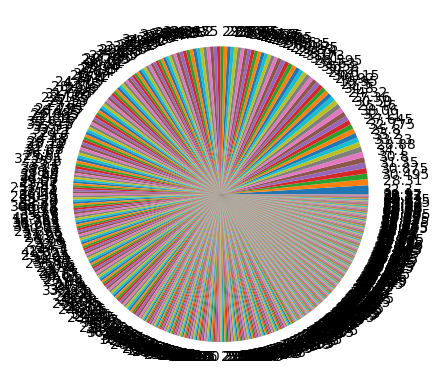

In [ ]:
df['bmi'].value_counts().plot.pie()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<Axes: title={'center': 'Box plot for charges'}, xlabel='charges', ylabel='smoker'>

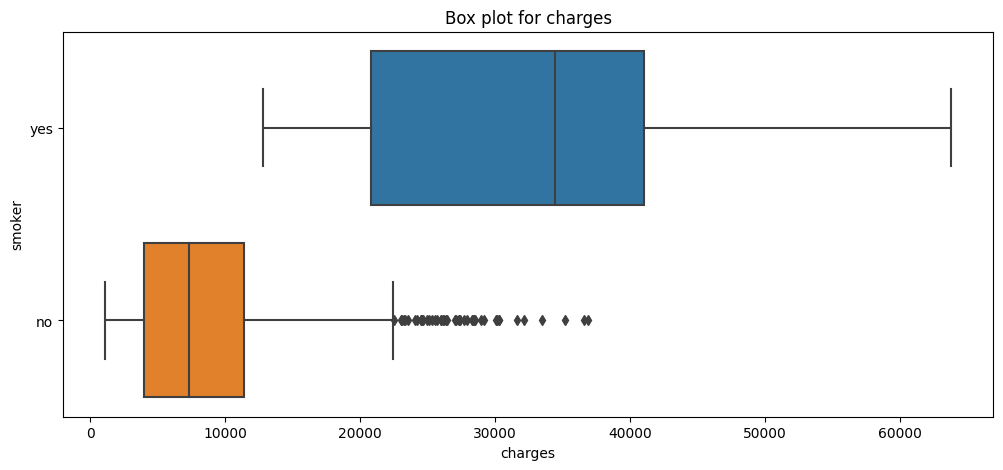

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges")
sns.boxplot(y="smoker", x="charges", data =  df, orient="h")

<Axes: title={'center': '  relationship between “smoker” and “region” '}, xlabel='region', ylabel='count'>

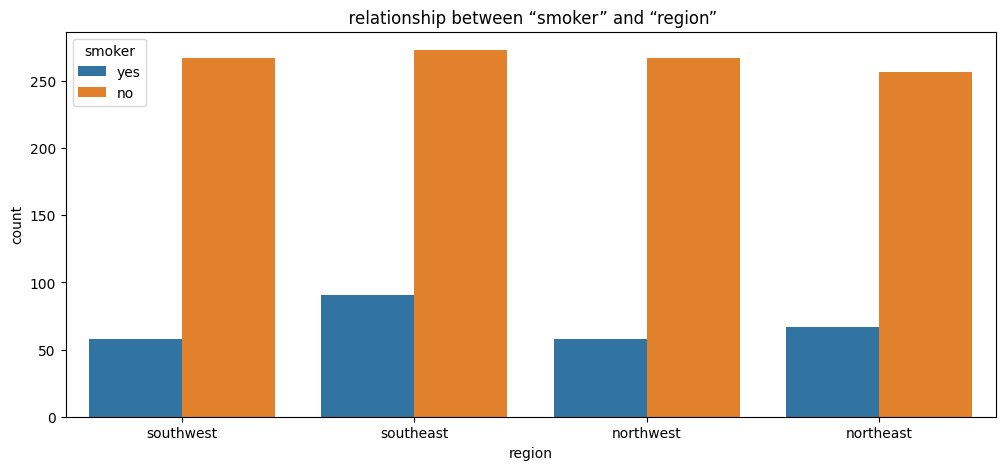

In [ ]:
plt.figure(figsize=(12,5))
plt.title("  relationship between “smoker” and “region” ")
sns.countplot(x ='region', hue = "smoker", data = df)

regionlara genel olarak baktığımızda sigara içme ve içmeme durumları birbirlerine oldukça yakın. southest ve northeast de diğerlerine göre sigara içenler daha fazla diyebiliriz fakat çok ayırt edici bir durum değildir.



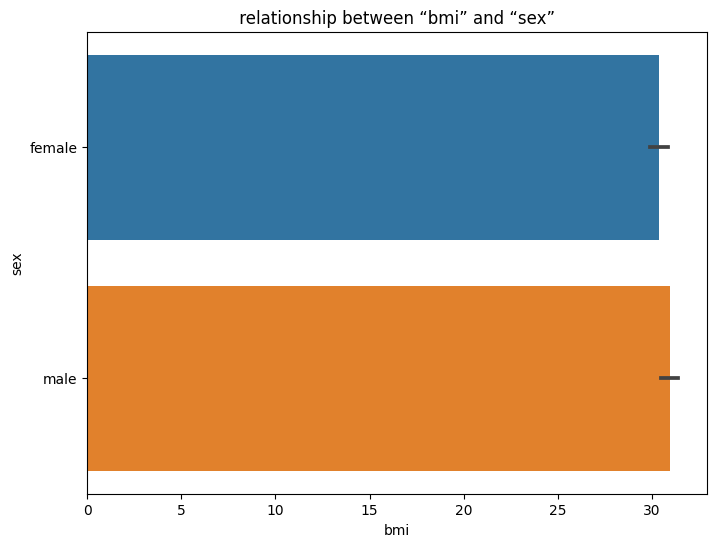

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='bmi', y='sex')
plt.xlabel('bmi')
plt.ylabel('sex')
plt.title(' relationship between “bmi” and “sex” ')
plt.show()

 "region" with the most "children".


<Axes: xlabel='region', ylabel='count'>

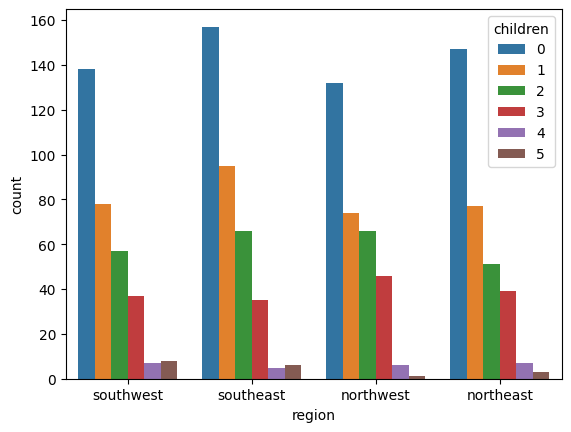

In [ ]:
sns.countplot(x ='region', hue = "children", data = df)

Tüm bölgelerde çoçuk olmama(0) oranı fazladır, southeast en fazla(70) çoçuk sayısına sahip bölgedir.

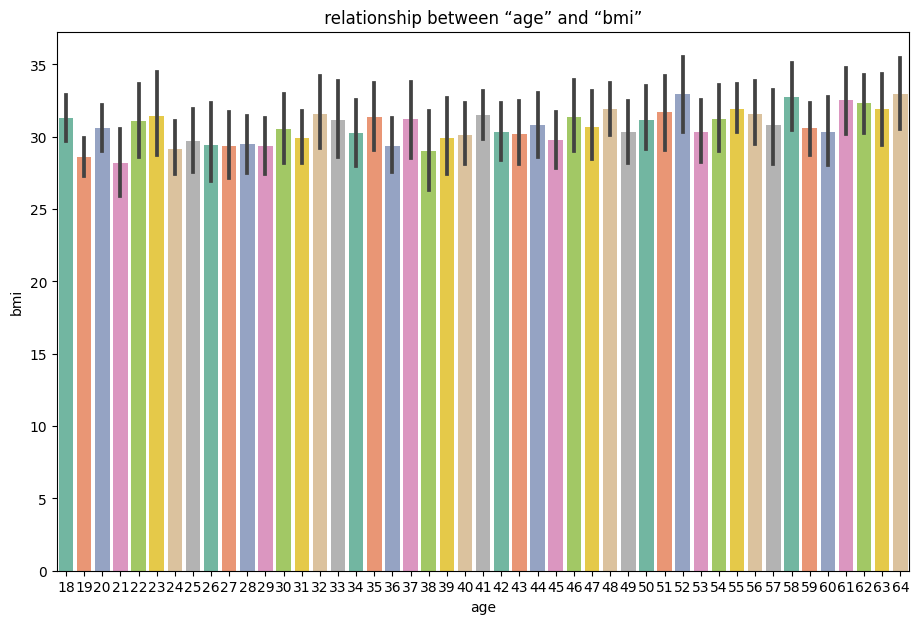

In [ ]:
#sayısal görselleştirme
f, ax = plt.subplots(1, 1, figsize=(11, 7))
plt.title(' relationship between “age” and “bmi” ')
ax = sns.barplot(x='age', y='bmi', data=df, palette='Set2')

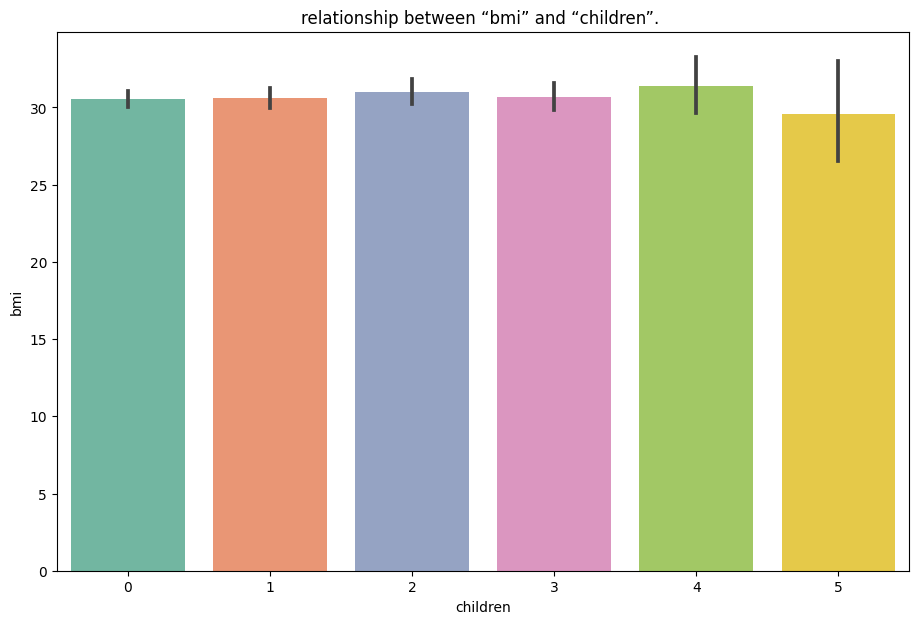

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(11, 7))
plt.title('relationship between “bmi” and “children”. ')
ax = sns.barplot(x='children', y='bmi', data=df, palette='Set2')

 Is there an outlier in the "bmi" variable? Please review.


<Axes: xlabel='bmi'>

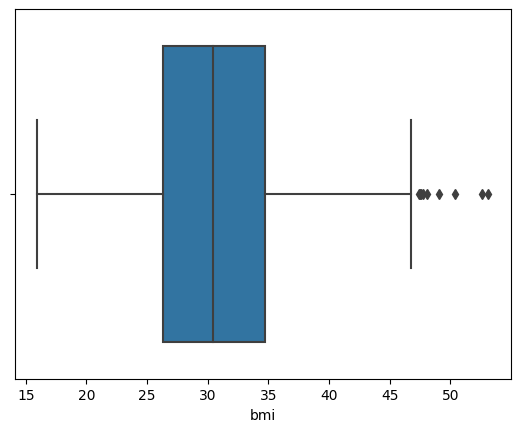

In [ ]:
sns.boxplot(x="bmi", data=df)

evet, bmı değerine ait 7 tane aykırı değer vardır. bmi 45-60 olması mümkün değildir.veri yanlış işlenmiş olabilir.kaldırılması gerekiyor.

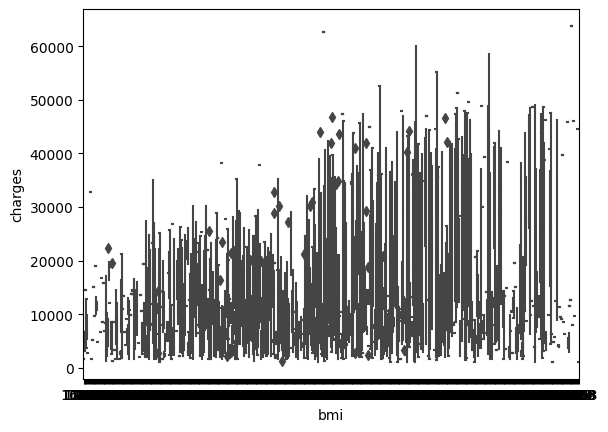

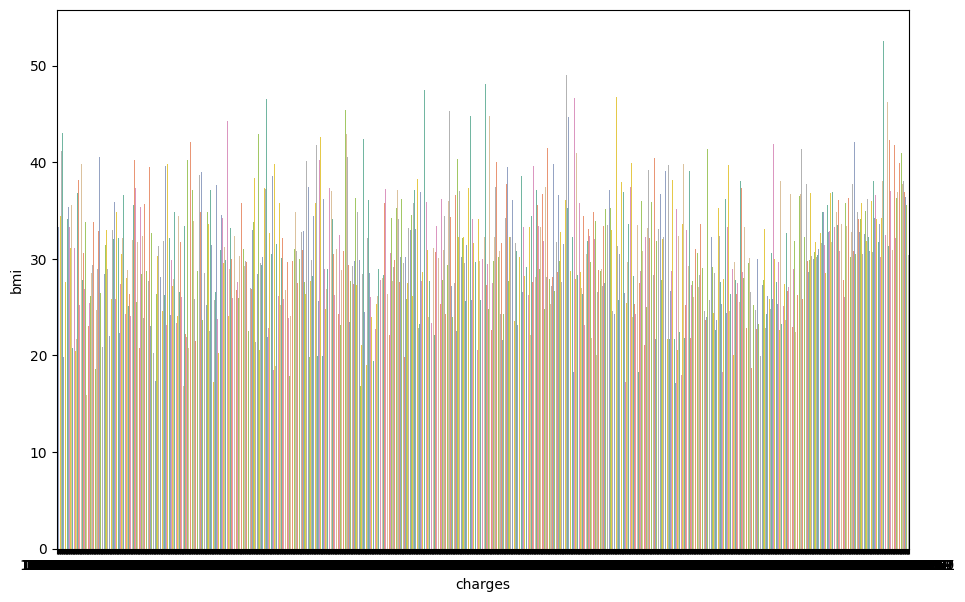

In [ ]:
sns.boxplot(x = df['bmi'],
            y = df['charges'])

f, ax = plt.subplots(1, 1, figsize=(11, 7))
ax = sns.barplot(x='charges', y='bmi', data=df, palette='Set2')

Çubuk grafiğini kullanarak “region”, “smoker” ve “bmi” arasındaki ilişkiyi inceleyin.

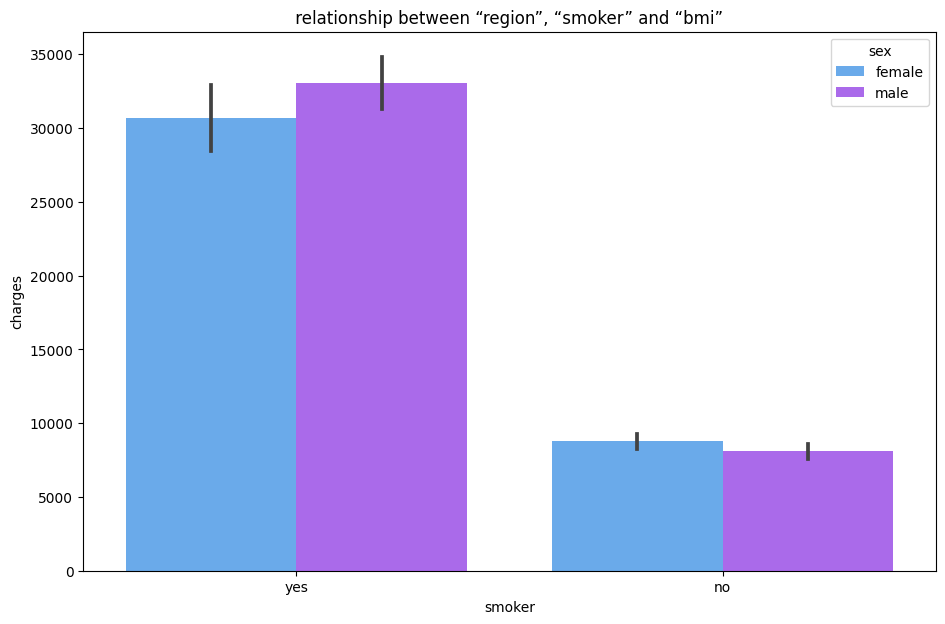

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(11, 7))
plt.title(' relationship between “region”, “smoker” and “bmi” ')
sax = sns.barplot(x='smoker', y='charges', hue='sex', data=df, palette='cool')

Sigara içen kadın ve erkekler için charge yüksektir, içmeyenlerde ise maliyet oldukça düşüktür.

In [ ]:
X = df.drop('charges', axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [ ]:
linear_reg_model= LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

LinearRegression()